# Shallow model explanation with channel-wise occlusion

In [1]:
import numpy as np
import pandas as pd
# import h5py
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
from brain_age_prediction import utils, viz
importlib.reload(utils)
importlib.reload(viz)

<module 'brain_age_prediction.viz' from '/home/laurar/brain_age_1D-CNN/src/brain_age_prediction/viz.py'>

In [2]:
save_dir = '/ritter/share/projects/laura_riedel_thesis/'
# load colour maps
network_colour_map = viz.get_colour_map('network')
area_colour_map = viz.get_colour_map('area')

## Global explanations

In [3]:
occlusion_df = utils.get_occlusion_overview('shallow')
occlusion_df['abs pred diff'] = occlusion_df['pred diff'].abs()
occlusion_df

,eid,parcellation,hemisphere,network,area,pred diff,abs pred diff
0,1217464,LH_Vis_1,LH,Vis,full Vis,-0.190620,0.190620
1,1217464,LH_Vis_2,LH,Vis,full Vis,2.078072,2.078072
2,1217464,LH_Vis_3,LH,Vis,full Vis,0.323120,0.323120
3,1217464,LH_Vis_4,LH,Vis,full Vis,0.201530,0.201530
4,1217464,LH_Vis_5,LH,Vis,full Vis,-0.727669,0.727669
...,...,...,...,...,...,...,...
499995,1053119,RH_Default_PFCdPFCm_1,RH,Default,PFCdPFCm,-0.466999,0.466999
499996,1053119,RH_Default_PFCdPFCm_2,RH,Default,PFCdPFCm,-1.411400,1.411400
499997,1053119,RH_Default_PFCdPFCm_3,RH,Default,PFCdPFCm,1.372879,1.372879
499998,1053119,RH_Default_pCunPCC_1,RH,Default,pCunPCC,-1.019325,1.019325


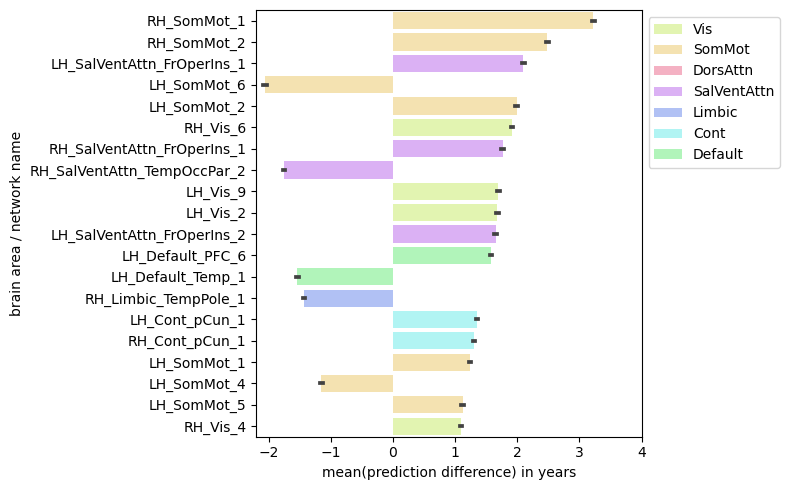

In [4]:
# 20 highest contributions
ranking_order = occlusion_df.groupby('parcellation')['abs pred diff'].mean().sort_values(ascending=False).index.values
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=occlusion_df,
            x='pred diff',
            y='parcellation',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            order=ranking_order[:20],
            ax=ax)
ax.set(xlabel='mean(prediction difference) in years',
       ylabel='brain area / network name')
ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
ax.set_xlim(-2.2,4)
fig.tight_layout()
fig.savefig('../../viz/Occlusion_global_20highest_nw_shallow.png')
plt.show()

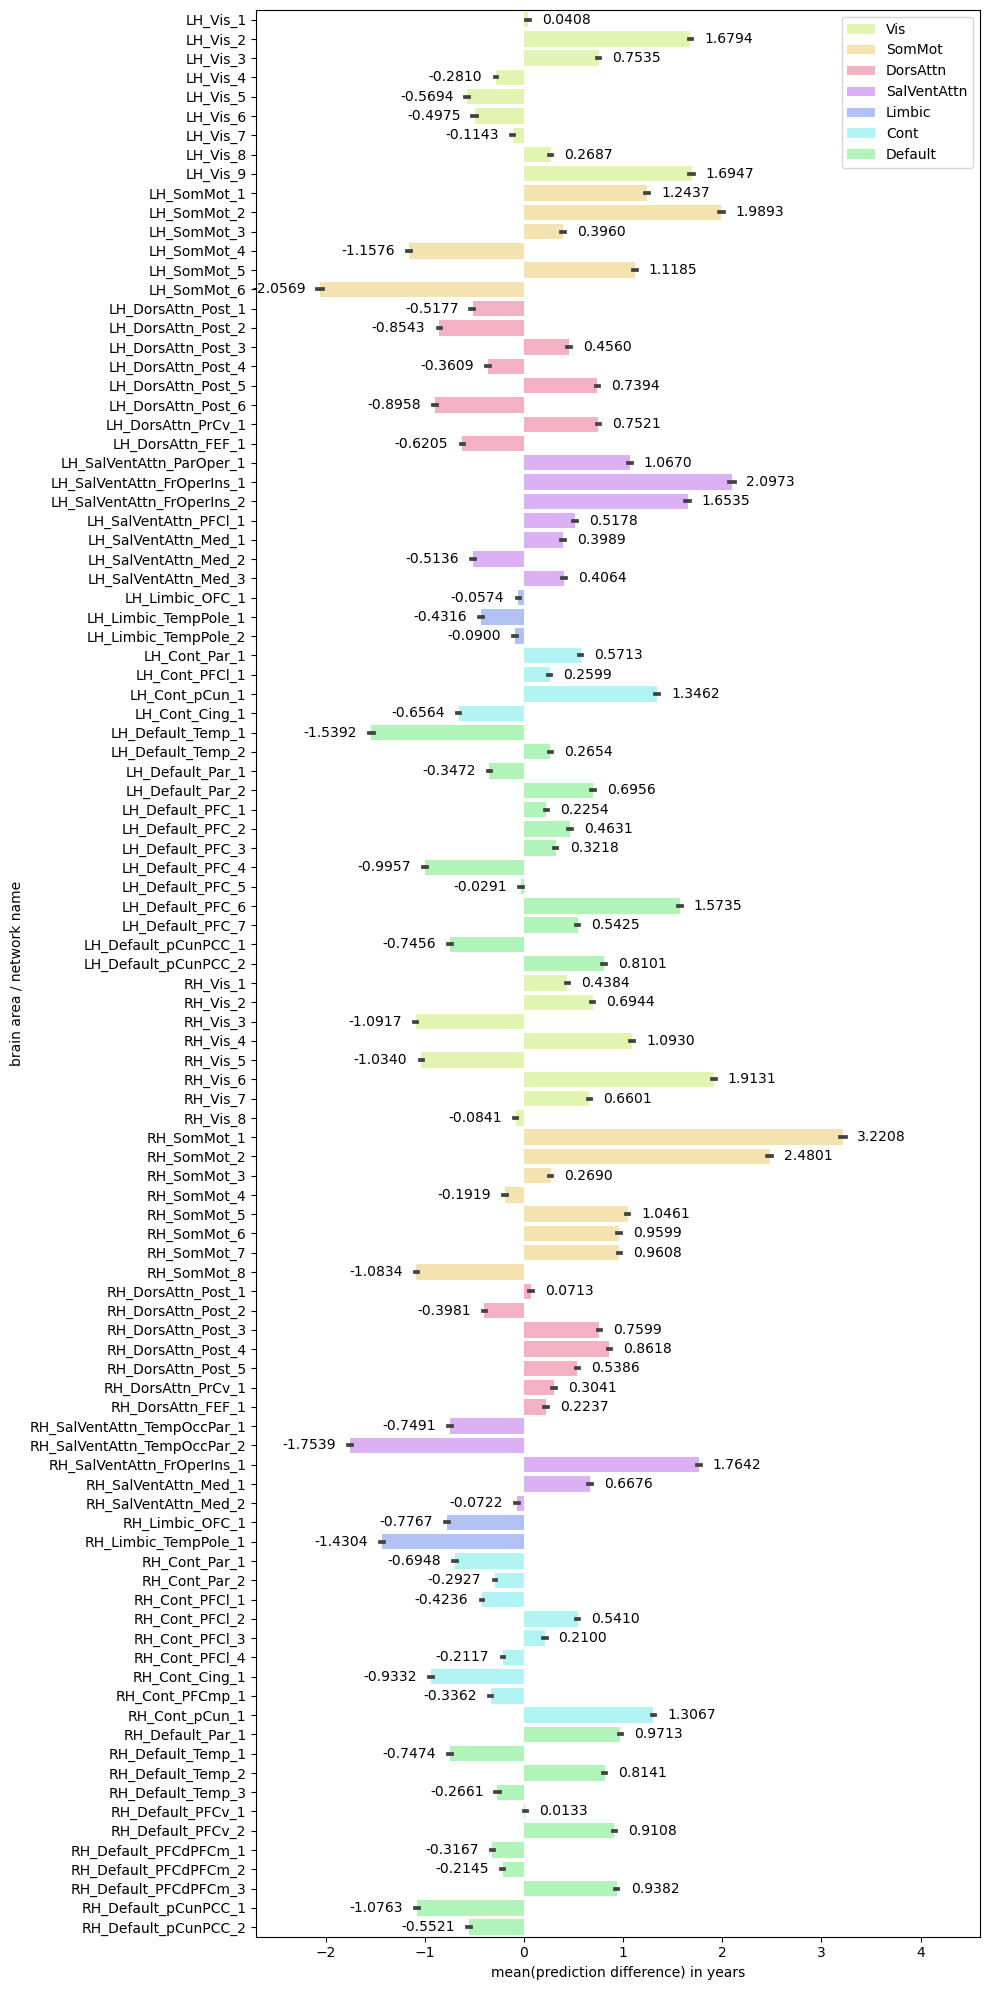

In [5]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(data=occlusion_df,
            x='pred diff',
            y='parcellation',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(prediction difference) in years',
       ylabel='brain area / network name')
for container in ax.containers:
    ax.bar_label(container, padding=10, fmt='%.4f')
ax.legend(loc='upper right')
ax.set_xlim(-2.7,4.6)
fig.tight_layout()
fig.savefig('../../viz/Occlusion_global_all_nw_shallow.png')
fig.show()

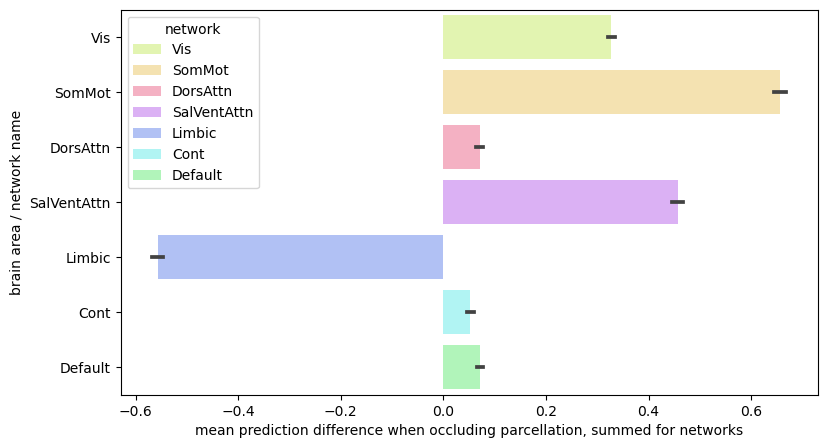

In [5]:
# "raw" network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=occlusion_df,
            x='pred diff',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean prediction difference when occluding parcellation, summed for networks',
       ylabel='brain area / network name')
plt.show()

In [6]:
# add area mean + area weight column
occlusion_df, area_mean_df = utils.calculate_areamean_weights_df(occlusion_df, 'pred diff')
occlusion_df

,eid,parcellation,hemisphere,network,area,pred diff,abs pred diff,area weight,mean area pred diff
0,1217464,LH_Vis_1,LH,Vis,full Vis,-0.190620,0.190620,1.000000,0.327292
1,1217464,LH_Vis_2,LH,Vis,full Vis,2.078072,2.078072,1.000000,0.327292
2,1217464,LH_Vis_3,LH,Vis,full Vis,0.323120,0.323120,1.000000,0.327292
3,1217464,LH_Vis_4,LH,Vis,full Vis,0.201530,0.201530,1.000000,0.327292
4,1217464,LH_Vis_5,LH,Vis,full Vis,-0.727669,0.727669,1.000000,0.327292
...,...,...,...,...,...,...,...,...,...
499995,1053119,RH_Default_PFCdPFCm_1,RH,Default,PFCdPFCm,-0.466999,0.466999,0.125000,0.135695
499996,1053119,RH_Default_PFCdPFCm_2,RH,Default,PFCdPFCm,-1.411400,1.411400,0.125000,0.135695
499997,1053119,RH_Default_PFCdPFCm_3,RH,Default,PFCdPFCm,1.372879,1.372879,0.125000,0.135695
499998,1053119,RH_Default_pCunPCC_1,RH,Default,pCunPCC,-1.019325,1.019325,0.166667,-0.390968


In [7]:
area_mean_df

,network,area,area weight,mean area pred diff
0,Vis,full Vis,1.000000,0.327292
1,SomMot,full SomMot,1.000000,0.656744
2,DorsAttn,Post,0.733333,0.036378
3,DorsAttn,PrCv,0.133333,0.528107
4,DorsAttn,FEF,0.133333,-0.198424
5,SalVentAttn,Med,0.416667,0.177387
6,SalVentAttn,FrOperIns,0.250000,1.838356
7,SalVentAttn,TempOccPar,0.166667,-1.251510
8,SalVentAttn,ParOper,0.083333,1.066961
9,SalVentAttn,PFCl SalVentAttn,0.083333,0.517828


In [8]:
weighted_networks_df = utils.get_weighted_network_average(occlusion_df, value='mean area pred diff')
weighted_networks_df

,network,weighted mean
0,Vis,0.327292
1,SomMot,0.656744
2,DorsAttn,0.044344
3,SalVentAttn,0.438966
4,Limbic,-0.578789
5,Cont,0.056273
6,Default,0.072477


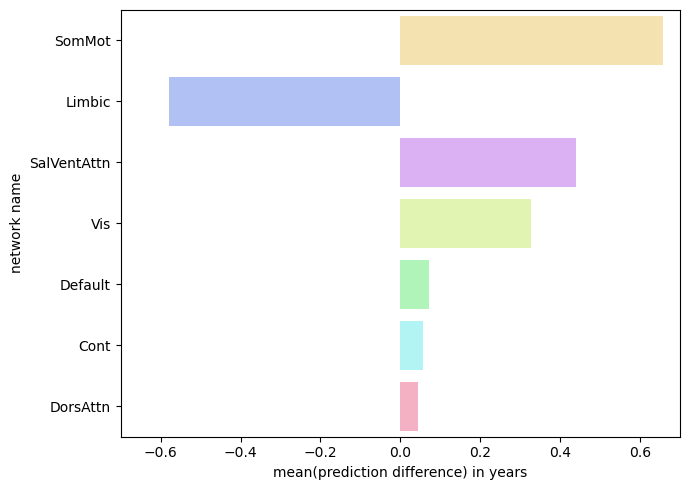

In [9]:
# weighted network mean
sort_order = weighted_networks_df.sort_values('weighted mean',ascending=False,key=lambda col: col.abs()).network
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=weighted_networks_df,
            x='weighted mean',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            order=sort_order,
            ax=ax)
ax.set(xlabel='mean(prediction difference) in years',
       ylabel='network name')
ax.legend_.remove()
ax.set_xlim(-0.7,0.7)
fig.tight_layout()
fig.savefig('../../viz/Occlusion_global_weighted_nw_mean_shallow.png')
fig.show()

### Redo global explanations with absolute values

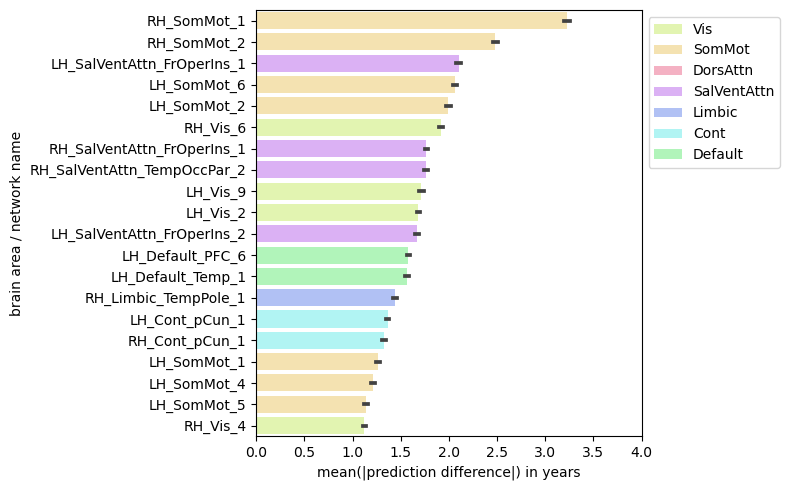

In [10]:
# 20 highest contributions
ranking_order = occlusion_df.groupby('parcellation')['abs pred diff'].mean().sort_values(ascending=False).index.values
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=occlusion_df,
            x='abs pred diff',
            y='parcellation',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            order=ranking_order[:20],
            ax=ax)
ax.set(xlabel='mean(|prediction difference|) in years',
       ylabel='brain area / network name')
ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
ax.set_xlim(0,4)
fig.tight_layout()
fig.savefig('../../viz/Occlusion_global_20highest_nw_shallow_abs.png')
plt.show()

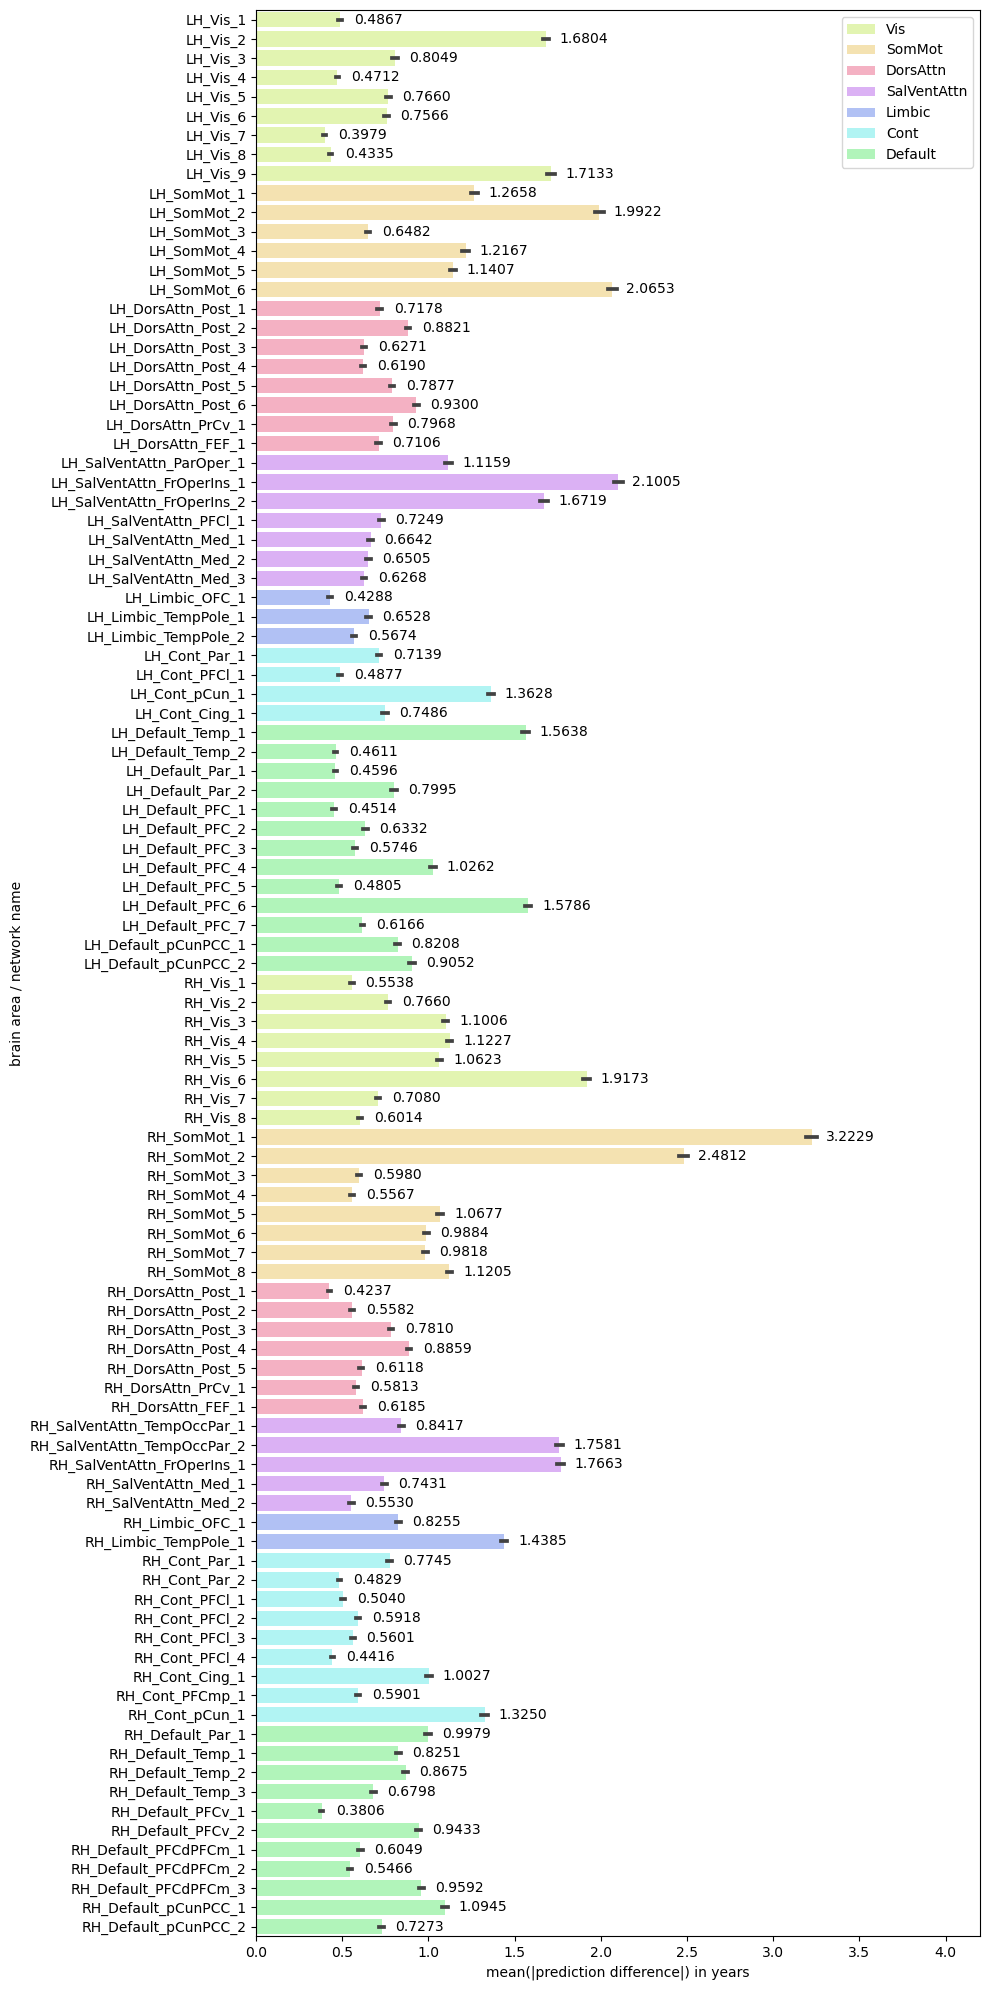

In [11]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(data=occlusion_df,
            x='abs pred diff',
            y='parcellation',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|prediction difference|) in years',
       ylabel='brain area / network name')
for container in ax.containers:
    ax.bar_label(container, padding=10, fmt='%.4f')
ax.legend(loc='upper right')
ax.set_xlim(0,4.2)
fig.tight_layout()
fig.savefig('../../viz/Occlusion_global_all_nw_shallow_abs.png')
fig.show()

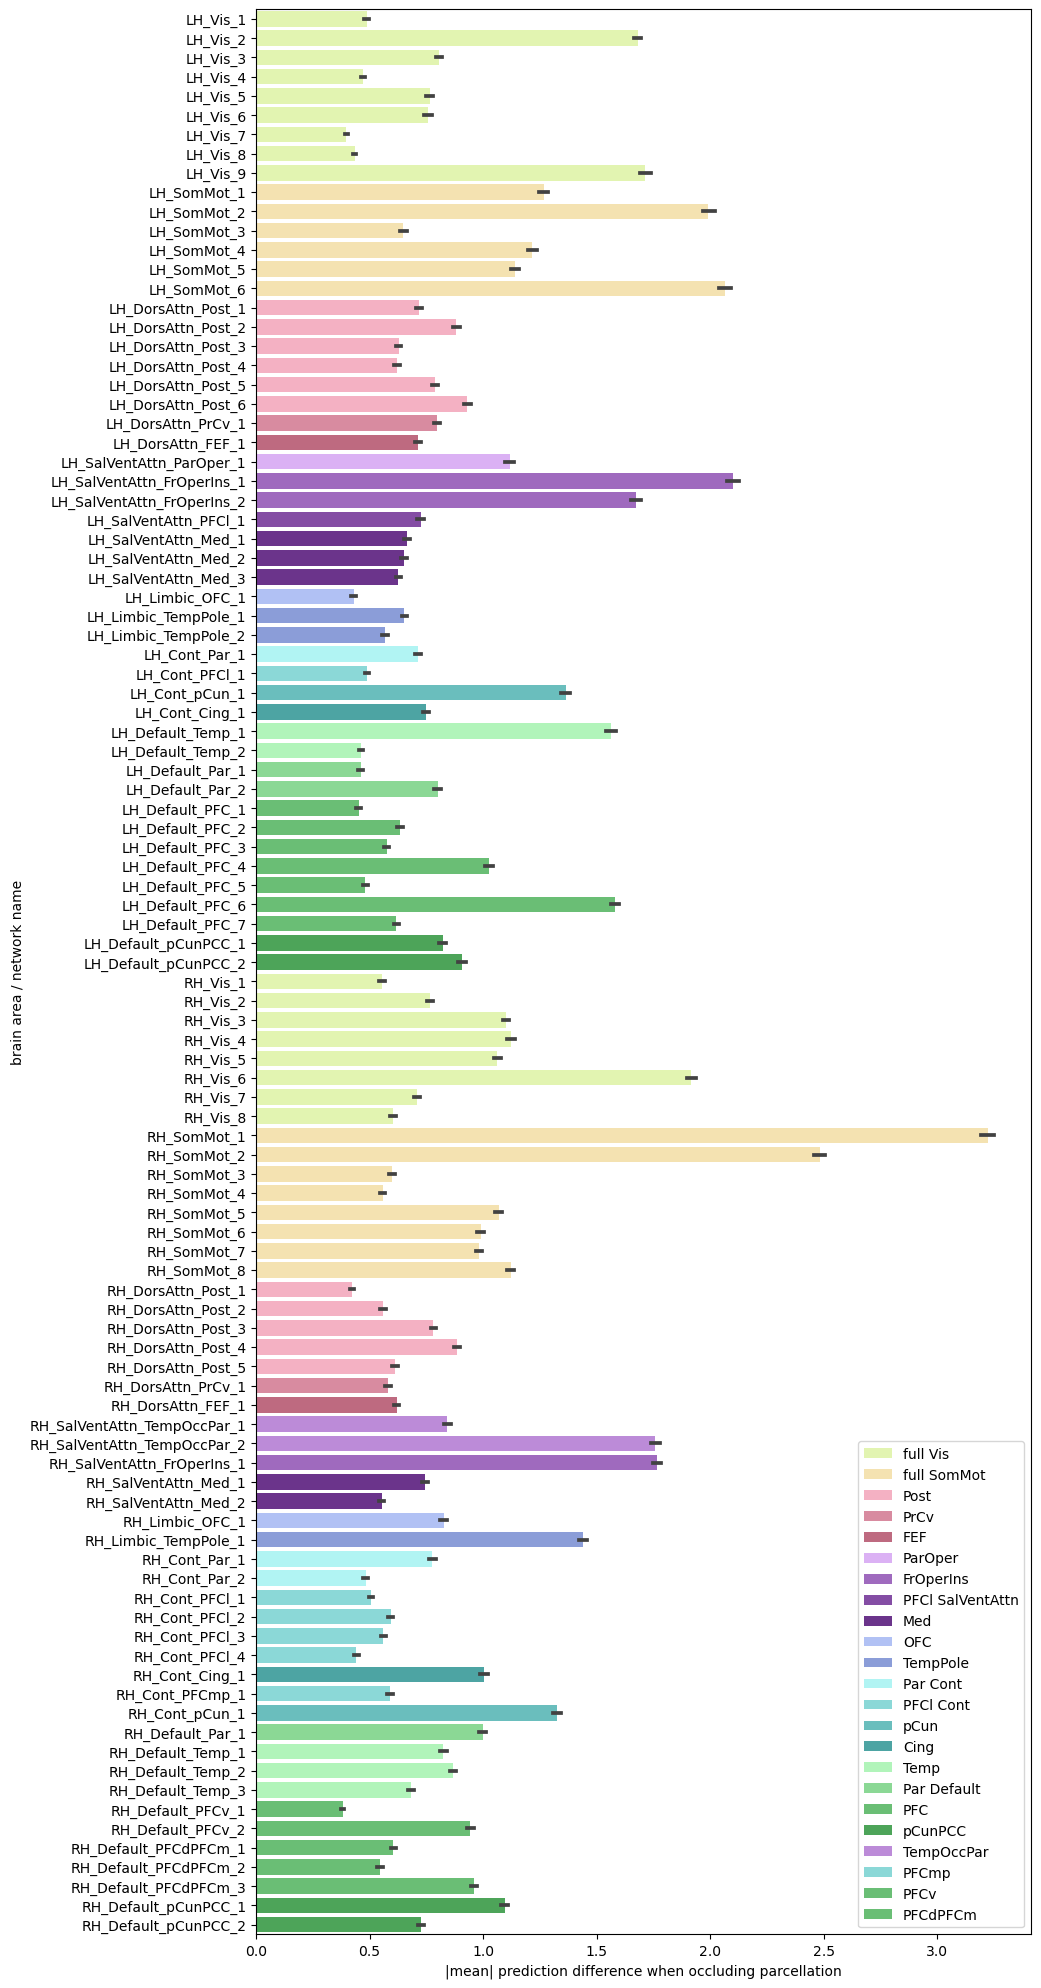

In [6]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=occlusion_df,
            x='abs pred diff',
            y='parcellation',
            orient='h',
            hue='area',
            palette=area_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='|mean| prediction difference when occluding parcellation',
       ylabel='brain area / network name')
ax.legend(loc='lower right')
plt.show()

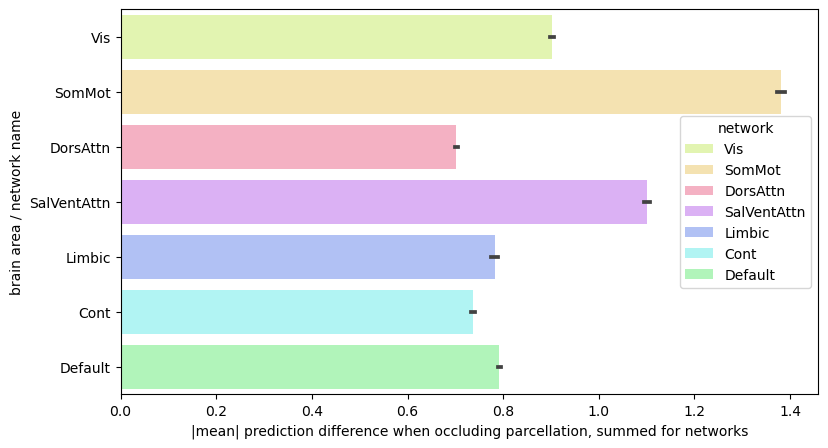

In [7]:
# "raw" network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=occlusion_df,
            x='abs pred diff',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='|mean| prediction difference when occluding parcellation, summed for networks',
       ylabel='brain area / network name')
plt.show()

In [12]:
# add area mean + area weight column
occlusion_df, area_mean_df = utils.calculate_areamean_weights_df(occlusion_df, 'abs pred diff')
# get weighted networks
weighted_networks_abs_df = utils.get_weighted_network_average(occlusion_df, value='mean area abs pred diff')
weighted_networks_abs_df

,network,weighted mean
0,Vis,0.902500
1,SomMot,1.381852
2,DorsAttn,0.709163
3,SalVentAttn,0.996117
4,Limbic,0.806510
5,Cont,0.658344
6,Default,0.798717


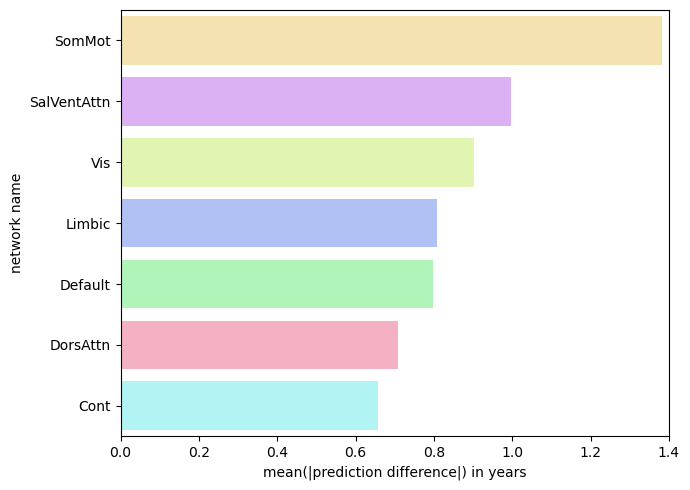

In [13]:
# weighted network mean
sort_order = weighted_networks_abs_df.sort_values('weighted mean',ascending=False).network
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=weighted_networks_abs_df,
            x='weighted mean',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            order=sort_order,
            ax=ax)
ax.set(xlabel='mean(|prediction difference|) in years',
       ylabel='network name')
ax.legend_.remove()
ax.set_xlim(0,1.4)
fig.tight_layout()
fig.savefig('../../viz/Occlusion_global_weighted_nw_mean_shallow_abs.png')
fig.show()

## Local explanations

In [35]:
young_sub = utils.get_sub_occlusion(1137757,'shallow','pred diff')
old_sub = utils.get_sub_occlusion(1318155,'shallow','pred diff') 
younger_pred_sub = utils.get_sub_occlusion(1184162,'shallow','pred diff') 
older_pred_sub = utils.get_sub_occlusion(1364474,'shallow','pred diff') 
min_bag_diff_sub = utils.get_sub_occlusion(1031078,'shallow','pred diff') 
max_bag_diff_sub = utils.get_sub_occlusion(1457519,'shallow','pred diff') 

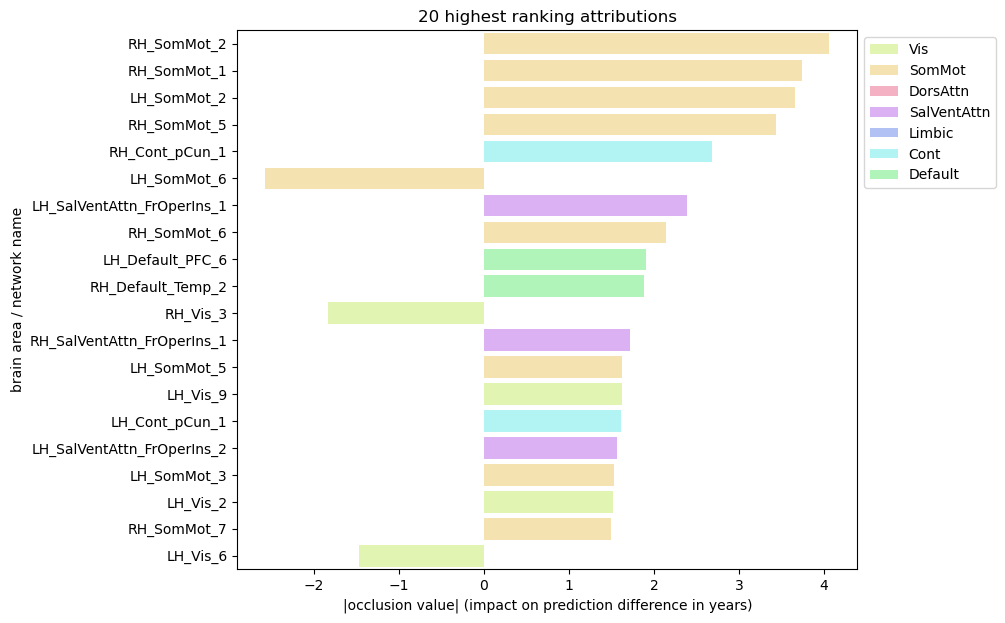

In [36]:
viz.simple_local_explanation(young_sub,'parcellation',
                             'occlusion','prediction difference',abs=False)

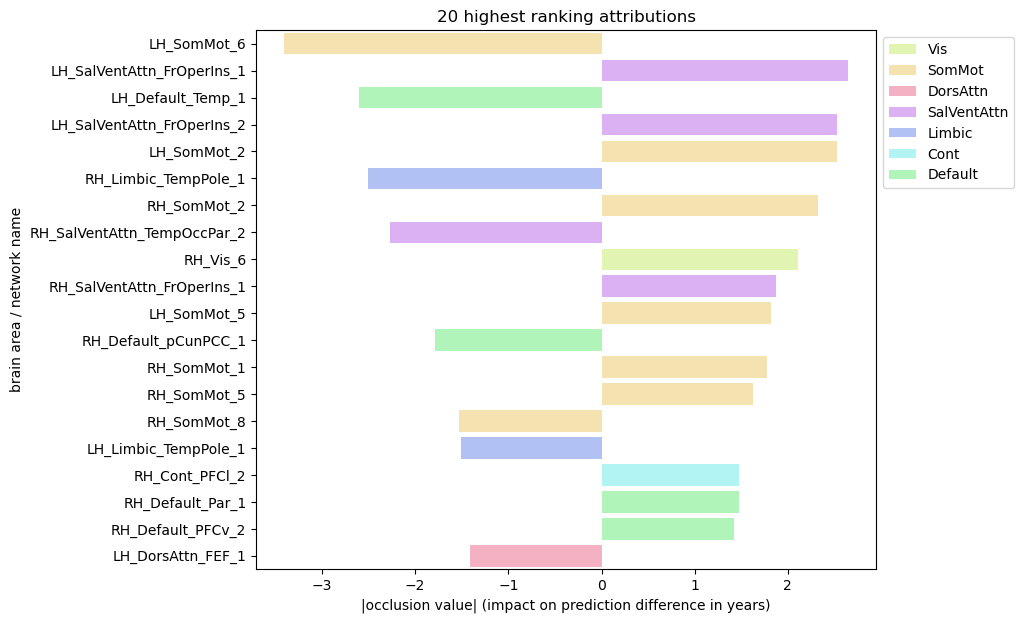

In [37]:
viz.simple_local_explanation(old_sub,'parcellation',
                             'occlusion','prediction difference',abs=False)

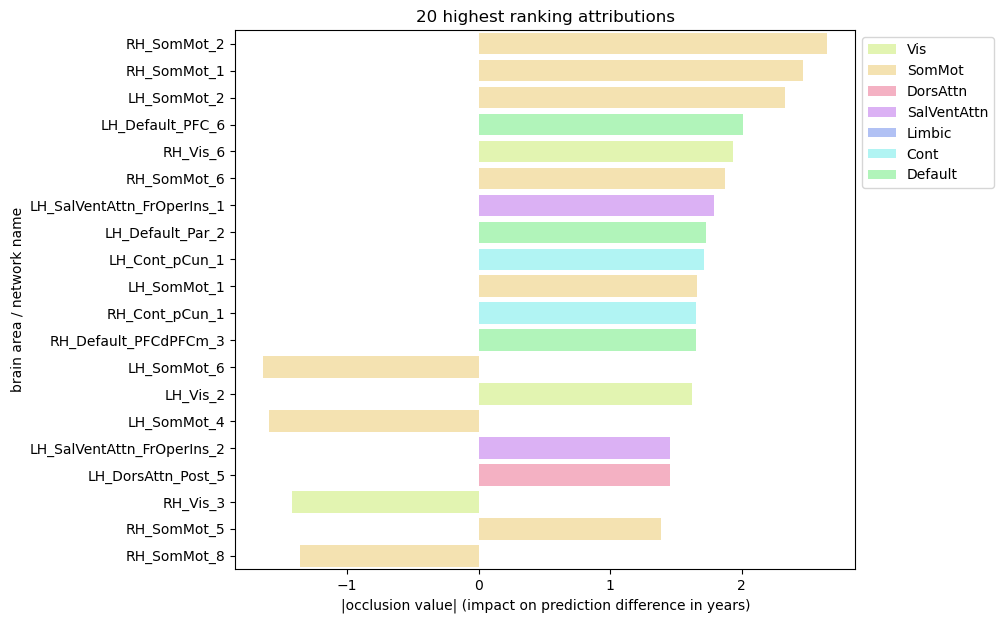

In [38]:
viz.simple_local_explanation(younger_pred_sub,'parcellation',
                             'occlusion','prediction difference',abs=False)

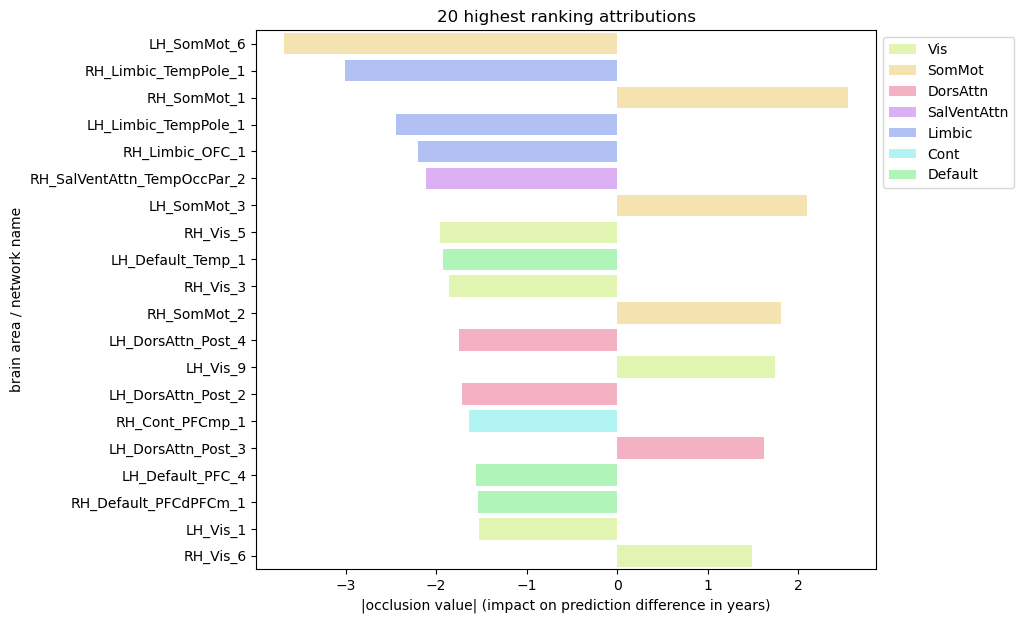

In [39]:
viz.simple_local_explanation(older_pred_sub,'parcellation',
                             'occlusion','prediction difference',abs=False)

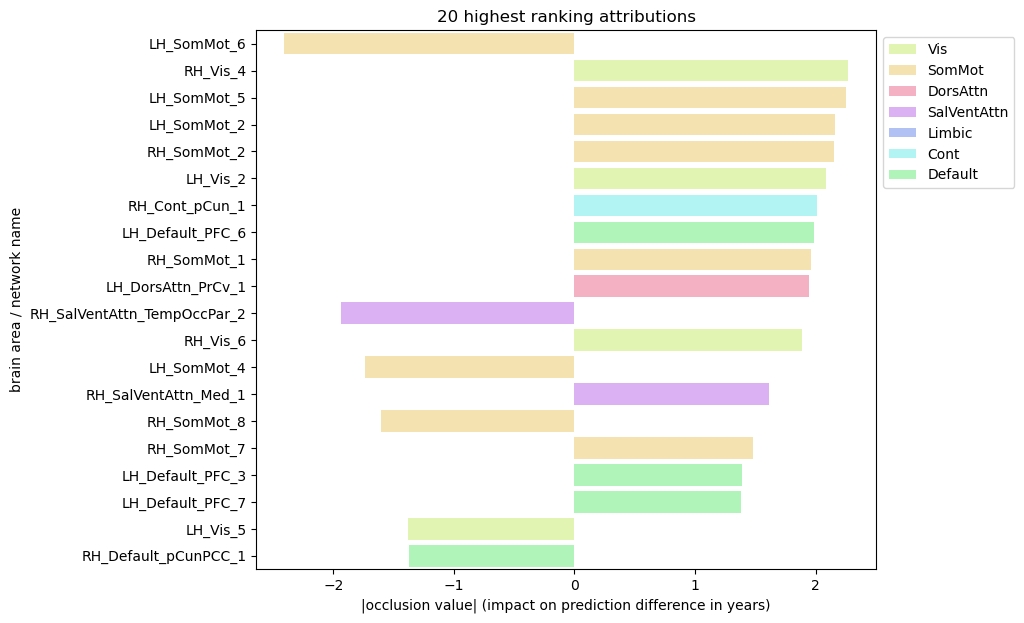

In [40]:
viz.simple_local_explanation(min_bag_diff_sub,'parcellation',
                             'occlusion','prediction difference',abs=False)

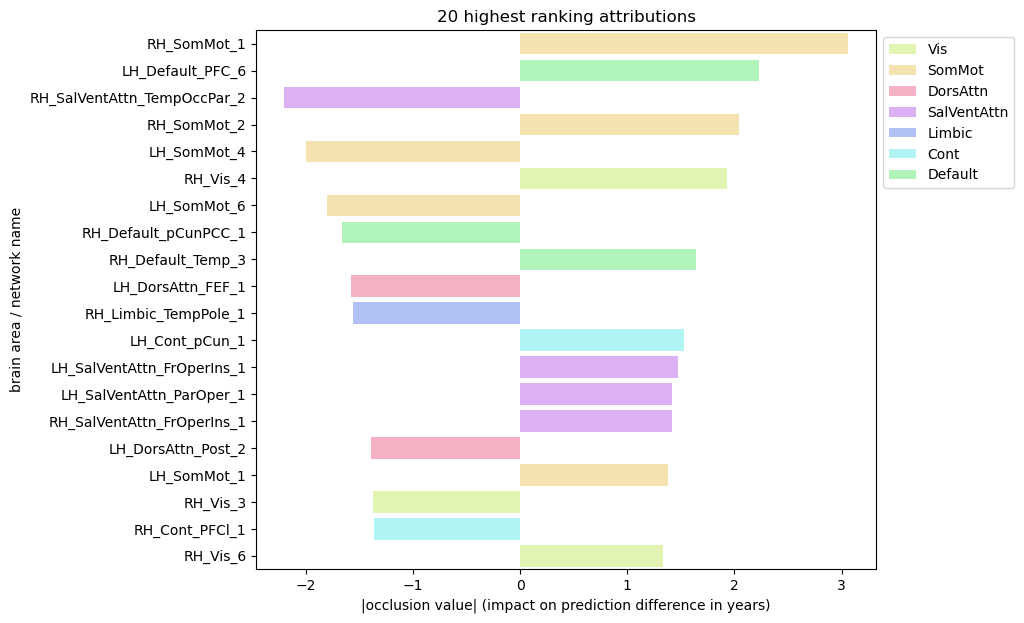

In [41]:
viz.simple_local_explanation(max_bag_diff_sub,'parcellation',
                             'occlusion','prediction difference',abs=False)

## Save visualisations

In [5]:
local_sub_ids = [1137757,1318155,1184162,1364474,1031078,1457519]

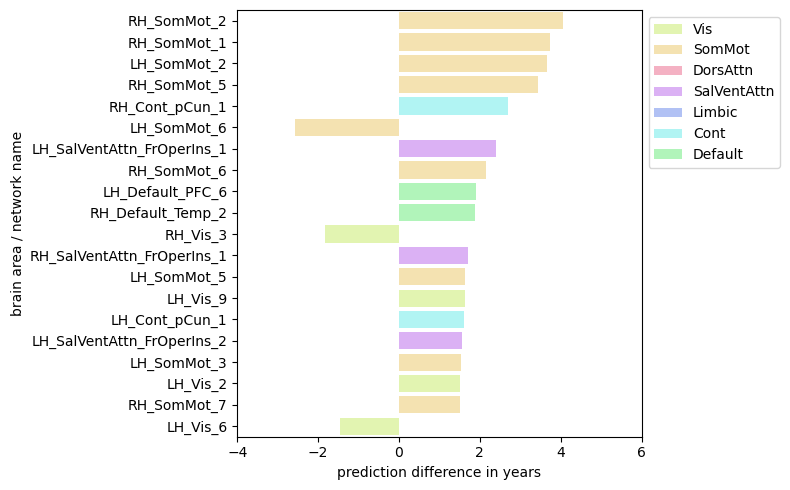

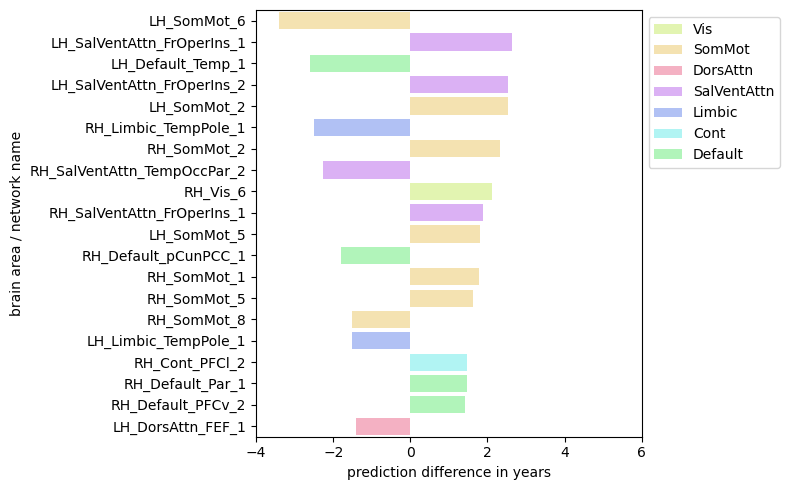

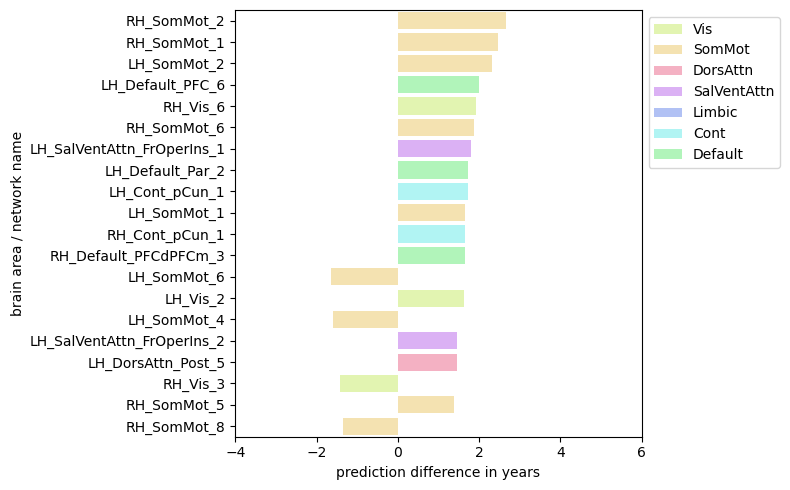

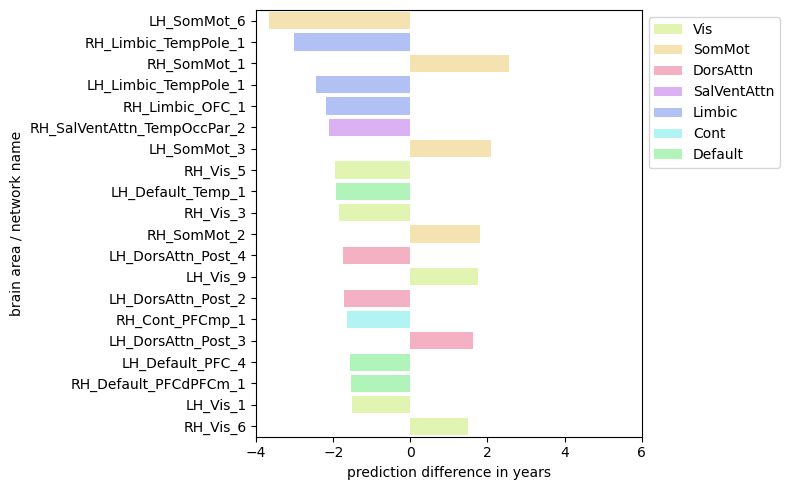

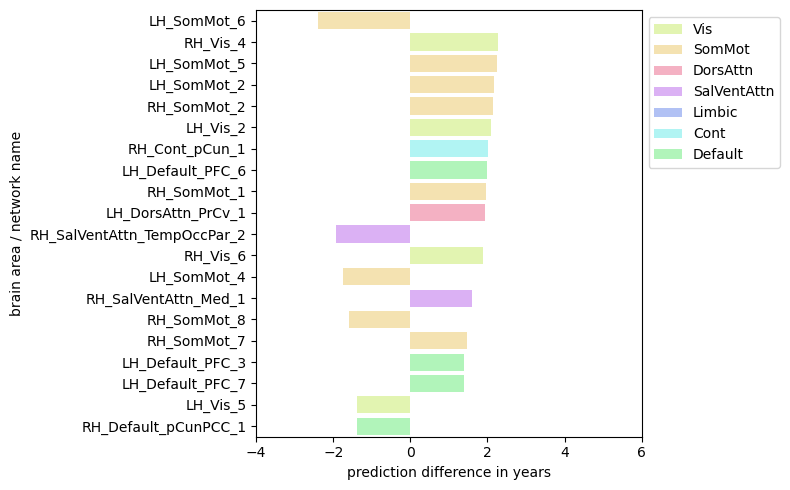

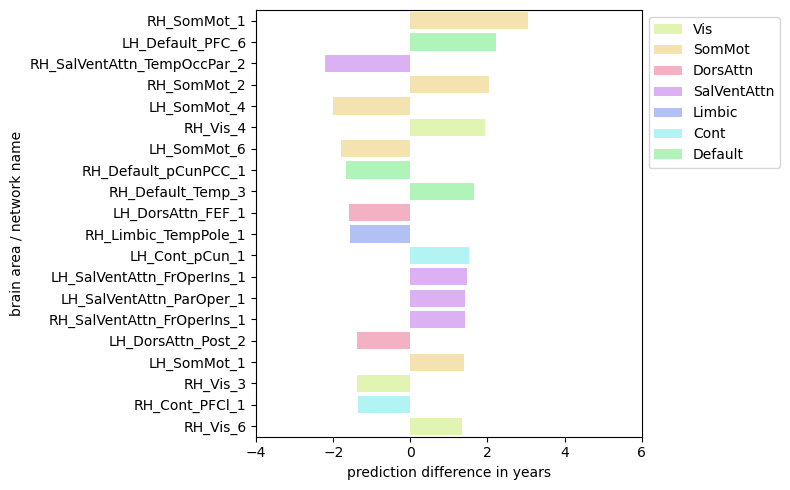

In [11]:
for id in local_sub_ids:
    sub_data = utils.get_sub_occlusion(id,'shallow','pred diff')
    viz.save_parcel_explanation(sub_data, id, xlim=(-4,6), explanation='occlusion',
                                column='prediction difference',absolute=False,
                                save_name=f'parcellation_occlusion_{id}_shallow.png')